# Using Python for Corporate Finance

A model to create a better way to make decisions on a corporation's use of cash.

5 Ways to Use Cash

1. Reinvest in current businesses.
2. Buy new businesses.
3. Pay down debt.
4. Buy back stock.
5. Issue dividends.



Weighted Average Cost of Capital

In a broad sense, a company finances its assets either through debt or with equity. WACC is the average of the costs of these types of financing, each of which is weighted by its proportionate use in a given situation. By taking a weighted average in this way, we can determine how much interest a company owes for each dollar it finances. 

Debt and equity are the two components that constitute a company’s capital funding. Lenders and equity holders will expect to receive certain returns on the funds or capital they have provided. Since cost of capital is the return that equity owners (or shareholders) and debt holders will expect, so WACC indicates the return that both kinds of stakeholders (equity owners and lenders) can expect to receive. Put another way, WACC is an investor’s opportunity cost of taking on the risk of investing money in a company.

A firm's WACC is the overall required return for a firm. Because of this, company directors will often use WACC internally in order to make decisions, like determining the economic feasibility of mergers and other expansionary opportunities. WACC is the discount rate that should be used for cash flows with risk that is similar to that of the overall firm.

**From Investopedia
**https://www.investopedia.com/terms/w/wacc.asp






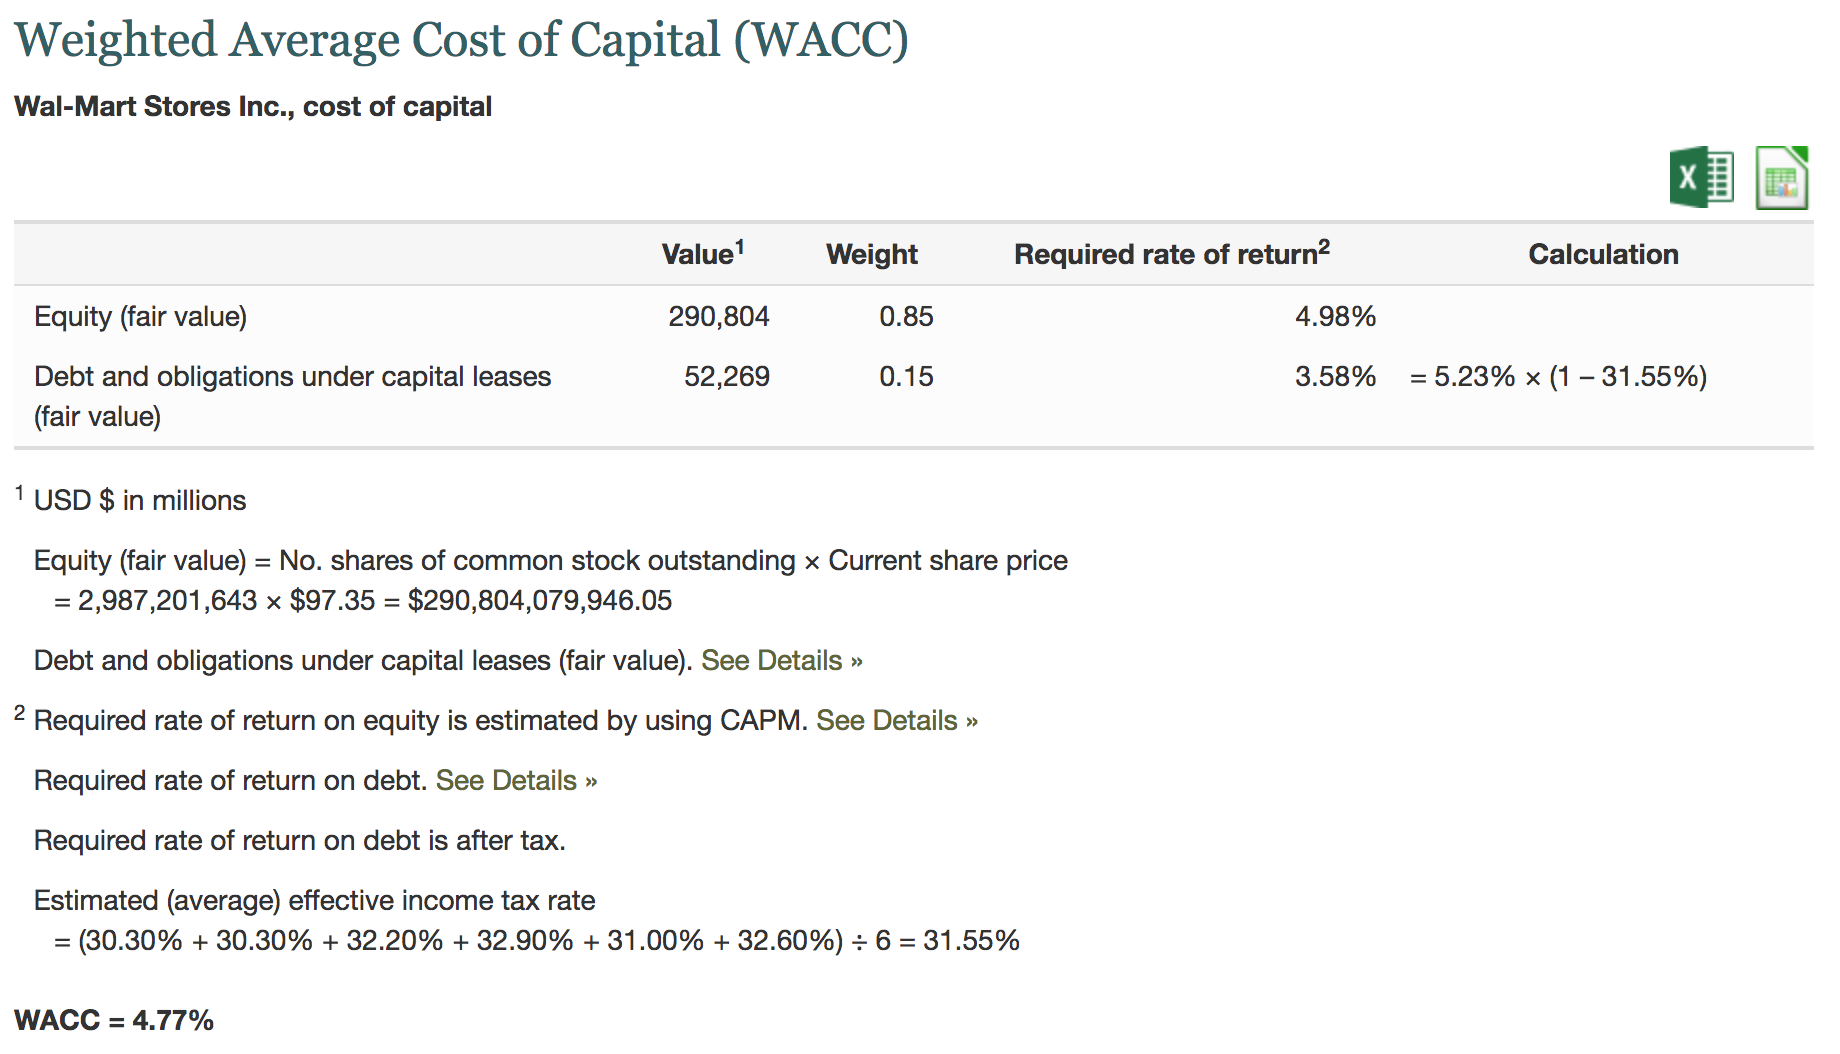

In [3]:
from IPython.display import Image
PATH = "/Users/rickroma/Desktop/"
Image(filename = PATH + "WMT_WACC_full.png", width=600, height=600)

Return on Invested Capital = Net Income - Dividends / Total Capital

Total Capital = Long-Term Debt + Shareholder Equity

**From Investopedia
**https://www.investopedia.com/terms/r/returnoninvestmentcapital.asp

In [9]:
#Return on Invested Capital versus Weighted Average Cost of Capital of Current Business

wacc = 0.08

def return_on_invested_capital(net_income,dividend,total_capital):
    roic = (net_income - dividend) / total_capital
    if roic > wacc:
        investment1 = "Yes"
        print("Return on Invested Capital is Greater than Weighted Average Cost of Capital")
    elif roic < wacc:
        investment1 = "No"
        print("Return on Invested Capital is Less than Weighted Average Cost of Capital")
    else:
        investment1 = "No"
        print("Return on Invested Capital and Weighted Average Cost of Capital are Equal")
    return "Return on Invested Capital: " + (str(roic*100)) +"%"
return_on_invested_capital(5000000,1000000,20000000)


 

Return on Invested Capital is Greater than Weighted Average Cost of Capital


'Return on Invested Capital: 20.0%'

In [18]:
#Return on Invested Capital versus Weighted Average Cost of Capital of Acquisition Targets

import numpy as np

comp = []

for x in range(3):
    ran = np.random.uniform(0, 0.3)
    comp.append(ran)
    
print(comp)




[0.012168970555666946, 0.059220124898058835, 0.12745490363083706]


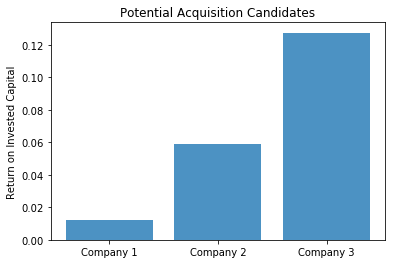

In [19]:
import matplotlib.pyplot as plt
import numpy as np
 
co = ('Company 1', 'Company 2', 'Company 3')
co_num = np.arange(len(co))
ret = comp
 
plt.bar(co_num, ret, align='center', alpha=0.8)
plt.xticks(co_num, co)
plt.ylabel('Return on Invested Capital')
plt.title('Potential Acquisition Candidates')
 
plt.show()

In [20]:
#Should we acquire any of the three target companies?

biz = [comp[0], comp[1], comp[2]]
biz2 = []
for x in range(3):
    if biz[x] > wacc:
        investment2 = "Yes"
    else: 
        biz[x] <= wacc
        investment2 = "No"
    biz2.append(investment2)

print("Is Company 1 a target to acquire? " + biz2[0])
print("Is Company 2 a target to acquire? " + biz2[1])
print("Is Company 3 a target to acquire? " + biz2[2])


bus1 = {biz[0]:biz2[0]}
bus2 = {biz[1]:biz2[1]}
bus3 = {biz[2]:biz2[2]}
target = {**bus1, **bus2, **bus3}
print(target)


Is Company 1 a target to acquire? No
Is Company 2 a target to acquire? No
Is Company 3 a target to acquire? Yes
{0.012168970555666946: 'No', 0.059220124898058835: 'No', 0.12745490363083706: 'Yes'}


Weighted Average Cost of Capital: 8.0%


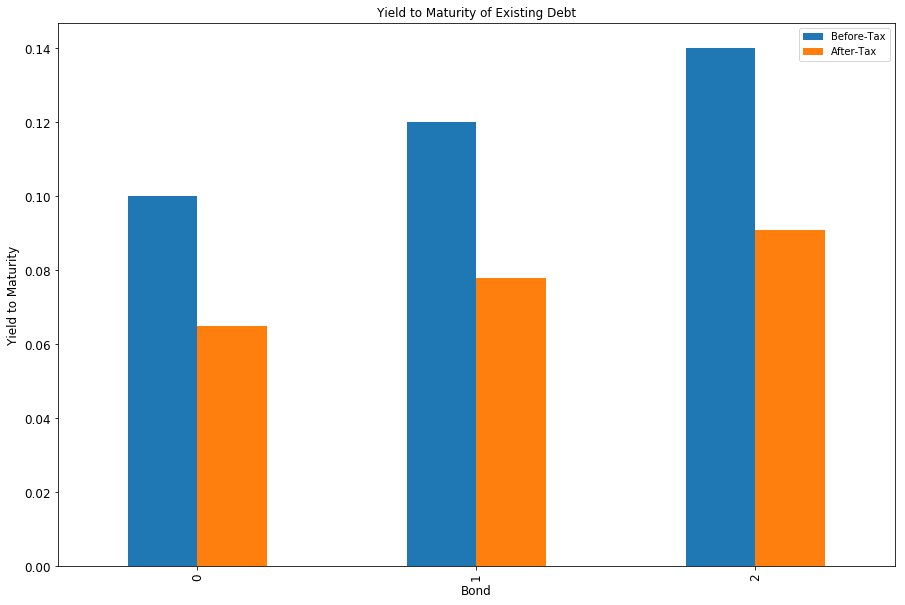

In [21]:
print("Weighted Average Cost of Capital: " + str(wacc * 100) +"%")

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

debt = pd.read_csv('WACC_debt2.csv')
df_debt = DataFrame(debt)

import matplotlib.pyplot as plt
ax = df_debt[['Before-Tax','After-Tax']].plot(kind='bar', title ="Yield to Maturity of Existing Debt", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Bond", fontsize=12)
ax.set_ylabel("Yield to Maturity", fontsize=12)
plt.show()





        


In [22]:
print(wacc)

paydown = []
for index,row in df_debt.iterrows():
    if row["After-Tax"] > wacc:
        paydown1 = "Yes"
    else:
        paydown1 = "No"
    paydown.append(paydown1)

print("Should we paydown Bond 1? " + paydown[0])
print("Should we paydown Bond 2? " + paydown[1])
print("Should we paydown Bond 3? " + paydown[2])

0.08
Should we paydown Bond 1? No
Should we paydown Bond 2? No
Should we paydown Bond 3? Yes


In [23]:
import pandas_datareader as pdr
from datetime import datetime

gm = pdr.get_data_yahoo(symbols='GM', start=datetime(2016, 12, 1), end=datetime(2017, 11, 30))
type(gm)


pandas.core.frame.DataFrame

In [24]:
bvps = 30.35
buy_ratio = 1.20
buyback = float(format(bvps * buy_ratio, '.2f'))
buyback

36.42

In [25]:
buy = []

for row in gm['Open']:
    if row < buyback:
        buy.append('Yes')
    else:
        row > buyback
        buy.append('No')

gm['Buyback?'] = buy

print(gm)

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2016-12-01  34.810001  36.660000  34.790001  36.430000  34.924427  37092300   
2016-12-02  36.250000  36.299999  35.299999  35.410000  33.946583  22753400   
2016-12-05  35.349998  35.459999  34.910000  34.939999  33.859367  12440400   
2016-12-06  35.090000  35.160000  34.910000  35.070000  33.985344  11867800   
2016-12-07  35.180000  36.540001  35.090000  36.299999  35.177307  26622400   
2016-12-08  36.189999  36.459999  36.040001  36.419998  35.293591  14516000   
2016-12-09  36.410000  37.680000  36.410000  37.660000  36.495243  26434200   
2016-12-12  37.509998  37.740002  37.009998  37.099998  35.952564  15575200   
2016-12-13  37.150002  37.439999  36.950001  37.360001  36.204521   9228800   
2016-12-14  36.299999  36.779999  35.930000  35.950001  34.838131  19799000   
2016-12-15  35.869999  36.389999  35.779999  36.2400

If no other investments are available and there were no previous investments where ROIC is greater than WACC, the company should look at paying a special one-time dividend to their shareholders.